# Regression  with regularization
### please fill in the code snippet with '# TODO'

In [1]:
import numpy as np
import matplotlib.pyplot as plt

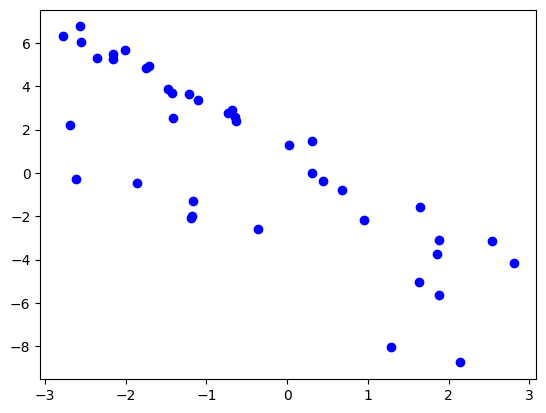

In [2]:
# Number of data points
data_points = 100 # number of generated data
n_outliers = 10 # decide how many outliers to introduce in the data
data_train = int(data_points * 0.4) # amount of training data

# Generating synthetic data
X = np.random.uniform(-3, 3, data_points)
y = -2*X + 1 
X = X[:, np.newaxis] 

# Adding noise
y += np.random.normal(0,1,data_points) # please add gaussian noise using numpy (variance 1)
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.4,random_state=10) # Split your data into training and test data

# Introduce outliers
outlier_indices = np.random.choice(data_train, n_outliers, replace=False)
y_train[outlier_indices] += np.random.normal(0,np.sqrt(10)) # please add gaussian noise with higher noise (variance 10)

plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.show()

In [3]:
# Linear Regression

from sklearn import linear_model

def linear_regression(X, y):
    model = linear_model.LinearRegression() # given observation data, return the estimated parameters using linear regression
    return model.fit(X,y)

theta_linear = linear_regression(X_train, y_train)
y_pred_linear = theta_linear.predict(X_test) # given the estimated parameters, return the predicted values


In [11]:
# Ridge Regression

from sklearn.linear_model import Ridge

def ridge_regression(X, y, alpha=1.0):
    # given observation data, return the estimated parameters using ridge regression
    ridge = Ridge(alpha)
    return ridge.fit(X,y)

theta_ridge = ridge_regression(X_train, y_train, alpha=0.1)
y_pred_ridge = theta_ridge.predict(X_test) # given the estimated parameters, return the predicted values


In [5]:
# Lasso Regression using Coordinate Descent
def soft_thresholding(z, gamma):
    # Apply the soft thresholding rule
    return np.sign(z) * max(abs(z) - gamma, 0)

def lasso_coordinate_descent_single_feature(X, y, alpha, num_iters=1000, eta=0.01):
    m = len(X)
    # Make sure X is a 2D array with a single feature
    X = X.reshape(-1, 1)
    # Ensure y is a column vector
    y = y.reshape(-1, 1)
    
    # Initialize parameters
    theta_0 = 0
    theta_1 = 0
    
    for iteration in range(num_iters):
        # Update for theta_0
        prediction = theta_0 + theta_1 * X
        theta_0 -= eta * np.sum(prediction - y) / m
        
        # Update for theta_1 with soft thresholding
        # Calculate the gradient ignoring the regularization term
        gradient = X.T.dot(prediction - y) / m
        # Apply soft thresholding to the gradient
        theta_1 = soft_thresholding(theta_1 - eta * gradient, alpha * eta)
    
    return theta_0, theta_1[0, 0]  # theta_1 is a 2D array, extract the value


theta_lasso = lasso_coordinate_descent_single_feature(X_train, y_train, alpha=0.01, num_iters=1000, eta=1e-2)
y_pred_lasso = X_test.dot(theta_lasso[1]) + theta_lasso[0]
print(theta_lasso)

(np.float64(-0.2886896898317375), np.float64(-1.9956651945600152))


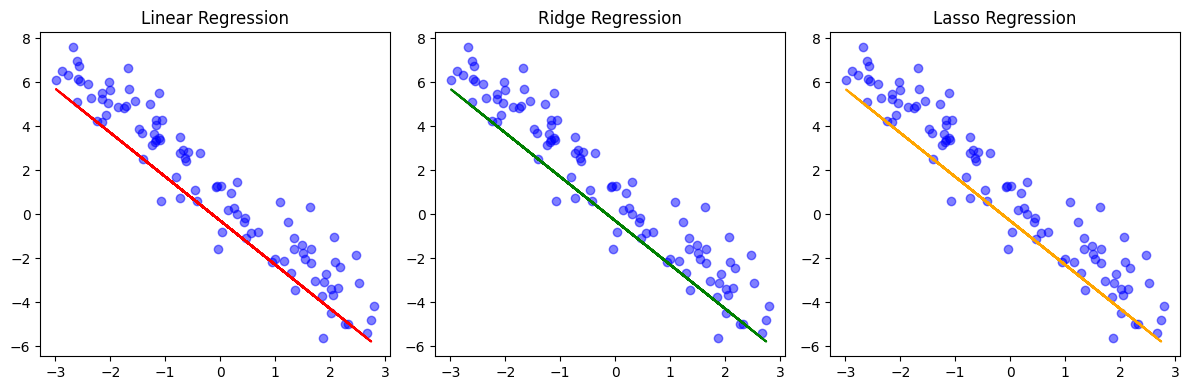

In [12]:
# Plotting the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X_test, y_pred_linear, color='red')
plt.title("Linear Regression")

plt.subplot(132)
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X_test, y_pred_ridge, color='green')
plt.title("Ridge Regression")

plt.subplot(133)
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X_test, y_pred_lasso, color='orange')
plt.title("Lasso Regression")

plt.tight_layout()
plt.show()